In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')




In [6]:
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [9]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


In [7]:
products.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [10]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [8]:
transactions.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [11]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [12]:
# Missing values
print("Missing values in Customers:", customers.isnull().sum())
print("Missing values in Products:", products.isnull().sum())
print("Missing values in Transactions:", transactions.isnull().sum())




Missing values in Customers: CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64
Missing values in Products: ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64
Missing values in Transactions: TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [13]:
# Duplicates
print("Duplicate rows in Customers:", customers.duplicated().sum())
print("Duplicate rows in Products:", products.duplicated().sum())
print("Duplicate rows in Transactions:", transactions.duplicated().sum())

Duplicate rows in Customers: 0
Duplicate rows in Products: 0
Duplicate rows in Transactions: 0


In [15]:
# Customers: Regions and Signup Trends
print(customers['Region'].value_counts())
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
print(customers['SignupDate'].dt.year.value_counts())




Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64
SignupDate
2024    79
2022    64
2023    57
Name: count, dtype: int64


In [16]:
# Products: Categories
print(products['Category'].value_counts())
print(products['Price'].describe())



Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64
count    100.000000
mean     267.551700
std      143.219383
min       16.080000
25%      147.767500
50%      292.875000
75%      397.090000
max      497.760000
Name: Price, dtype: float64


In [17]:
# Transactions: Revenue and Quantity Analysis
print(transactions['Quantity'].describe())
print(transactions['TotalValue'].describe())

count    1000.000000
mean        2.537000
std         1.117981
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: Quantity, dtype: float64
count    1000.000000
mean      689.995560
std       493.144478
min        16.080000
25%       295.295000
50%       588.880000
75%      1011.660000
max      1991.040000
Name: TotalValue, dtype: float64


In [18]:
# Merge datasets for a comprehensive view
merged_data = transactions.merge(customers, on='CustomerID').merge(products, on='ProductID')
print(merged_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe 2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia 2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe 2024-04-04   
3      601.36   300.68  Travis Campbell  South America 2024-04-11   
4      902.04   300.68    Timothy Perez         Europe 2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker  Elec

In [19]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   object        
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price_x          1000 non-null   float64       
 7   CustomerName     1000 non-null   object        
 8   Region           1000 non-null   object        
 9   SignupDate       1000 non-null   datetime64[ns]
 10  ProductName      1000 non-null   object        
 11  Category         1000 non-null   object        
 12  Price_y          1000 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(8)
memory usage: 101.7+ KB


EDA


<ipython-input-23-e073aed96b7d>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Region', palette='viridis')


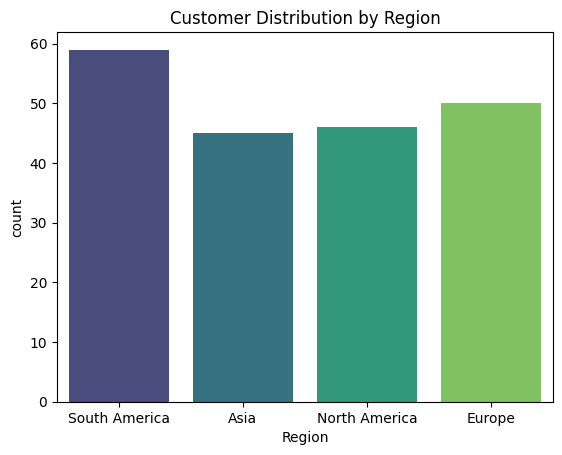

In [23]:
#Customer Distribution by Region

sns.countplot(data=customers, x='Region', palette='viridis')
plt.title('Customer Distribution by Region')
plt.show()


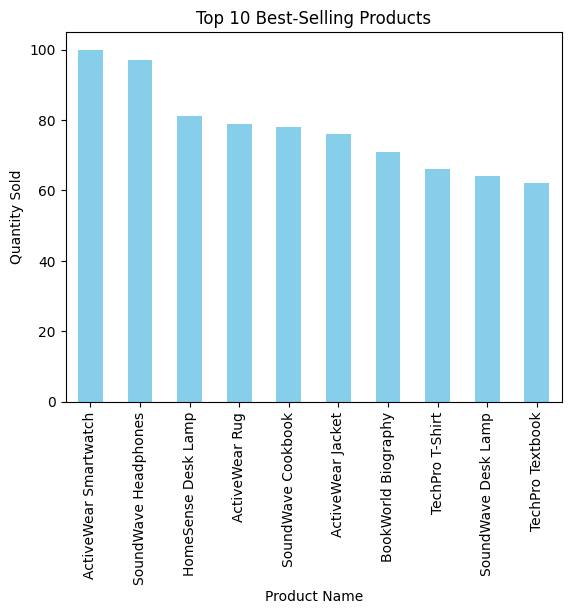

In [24]:
#Top-Selling Products
top_products = merged_data.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='bar', color='skyblue')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.show()


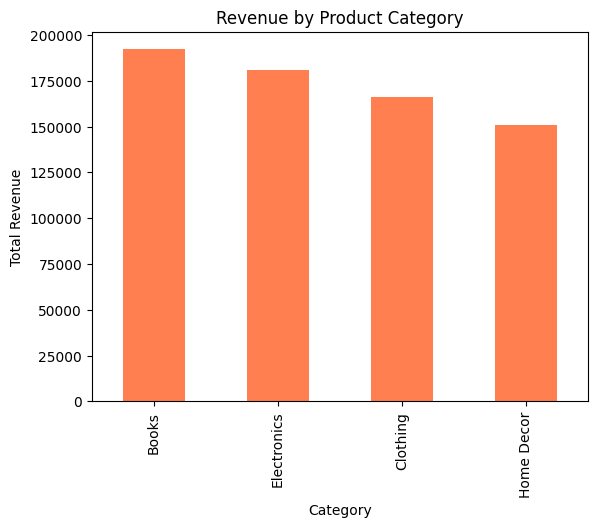

In [25]:
#Revenue by Product Category
category_revenue = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
category_revenue.plot(kind='bar', color='coral')
plt.title('Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Revenue')
plt.show()
